<a href="https://colab.research.google.com/github/nitishjoshi86/PythonNum/blob/main/pandastitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

#set seed for reproducibility
np.random.seed(seed = 1234)

In [3]:
#read from csv to pandas df

url = "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/titanic.csv"
df = pd.read_csv(url, header=0)

#first few items
df.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [4]:
import matplotlib.pyplot as plt

In [5]:
#describe features
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


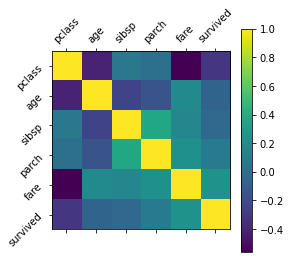

In [6]:
#correlation matrix

plt.matshow(df.corr())
cont_features = df.describe().columns
plt.xticks(range(len(cont_features)), cont_features, rotation = '45')
plt.yticks(range(len(cont_features)), cont_features, rotation = '45')
plt.colorbar()
plt.show()

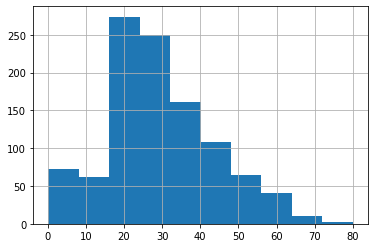

In [7]:
#histograms
df['age'].hist()

In [8]:
#unique values

df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [9]:
df['name'].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [10]:
#filtering

df[df['sex'] == 'female'].head() 

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [12]:
#sorting

df.sort_values('age', ascending = False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


In [13]:
#grouping

survived_group = df.groupby('survived')
survived_group.mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


In [14]:
#selecting row  0 , we can use iloc to get rows or columns at particular positions in the df

df.iloc[0, :]

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [16]:
#preprocessing data, rows with atleast one NaN value

df[pd.isnull(df).any(axis = 1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [23]:
#here i am filling data with median
median = df.median()
df = df.fillna(median)
df.head()

,level_0,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [24]:
df.describe() #count  will be same in every columns, we can also do it with dropna method where NaN will be dropped but for more accuracy we can fill with median values

,level_0,index,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,654.000000,654.000000,2.294882,29.503183,0.498854,0.385027,33.281086,0.381971
std,378.020061,378.020061,0.837836,12.905246,1.041658,0.865560,51.741500,0.486055
min,0.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,327.000000,327.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,654.000000,654.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,981.000000,981.000000,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [25]:
#lambda expressions to create new features

def get_family_size(sibsp, parch):
  family_size = sibsp+parch
  return family_size

In [26]:
df['family_size'] = df[['sibsp', 'parch']].apply(lambda x: get_family_size(x['sibsp'], x['parch']), axis =1)
df.head()

,level_0,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,family_size
0,0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1,0
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,3
2,2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,3
3,3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,3
4,4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,3


In [27]:
# Reorganize headers
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,female,29.0000,0,0,0,211.3375,S,1
1,1,male,0.9167,1,2,3,151.5500,S,1
2,1,female,2.0000,1,2,3,151.5500,S,0
3,1,male,30.0000,1,2,3,151.5500,S,0
4,1,female,25.0000,1,2,3,151.5500,S,0


In [28]:
# Saving dataframe to CSV
df.to_csv('processed_titanic.csv', index=False)

In [29]:
# See the saved file
!ls -l

total 44
-rw-r--r-- 1 root root 37786 Jul 13 09:24 processed_titanic.csv
drwxr-xr-x 1 root root  4096 Jul  1 13:42 sample_data
